#### Code Challenge Phase 2 Mock/Review

Yael's Tasty Treats is an Israeli eatery in NYC trying to offer its clientele traditional Israeli comfort dishes in a laidback environment. They have a few steady offerings on the menu. A fan favorite is Sabich (a stuffed pita with eggplant, eggs, tahini, salad and some spicy mango sauce). 

Data over the past year of sales of dishes of Sabich per day are well modeled by a normal distribution:

The mean is 80 plates per day of Sabich sold with a standard deviation of 22 plates.

Q1: What is the probability that on any given day that Yael's sells less than 45 plates?

In [4]:
from scipy.stats import norm

proba = norm.cdf(45, loc = 80, scale = 22)

In [5]:
proba

0.05581501817774509

Q2a: What is the Z-score at 32 plates of Sabich? **Note: I'm NOT talking about the Z-score of sample means**

In [6]:
z_score = (32 - 80)/22
z_score

-2.1818181818181817

Q2b: I decide to look at the counts of orders of Sabich over just 60 days. Computing the mean of the sample  and I calculate it to be 74. Calculate the Z-statistic of the sample mean based on the distribution of sample means.

In [109]:
import numpy as np

N = 60 # I have counts over 60 days = 60 samples
Xbar = 74 # sample mean
mu0 = 80 # population mean
sigma = 22 # population std

Zstatistic = (Xbar - mu0)/(sigma/np.sqrt(N))
Zstatistic

-2.1125363706585913

Q3: A marine biology survey vessel is estimating the length of adult male bottle nose dolphins in a region approximately 300 miles west of Point Reyes, CA in the Pacific. They measure 20 dolphins and get a mean of 2.6 m with a standard deviation of 0.3 m. 

Calculate the upper and lower bound of the 95% confidence interval for the mean.

In [38]:
# Manually:
from scipy.stats import t


N = 20
t_crit = t.ppf(.025, df = N -1)

Xbar_dolph = 2.6
std_dolph = 0.3

upper = Xbar_dolph + (np.abs(t_crit)*std_dolph)/np.sqrt(N)
lower = Xbar_dolph - (np.abs(t_crit)*std_dolph)/np.sqrt(N)
print(lower,upper)

2.4595956780740273 2.740404321925973


In [39]:
t.interval(0.95, loc = 2.6, scale = 0.3/np.sqrt(N), df = N - 1)

(2.4595956780740273, 2.740404321925973)

Q4: In words, what is the 95\% confidence interval telling us?

Q5: Yael's also serves sakshouka (egg poached in a tomato and red pepper sauce) with a side of challah as a breakfast/lunch special. The dish had only been on the menu for 2 weeks or so when Rachel Ray runs a Food Network special on The Joy of Cooking Sakshouka For Sunday Brunch. Your marketing manager believes that the running of this special bumped up the number of daily orders from the first two weeks.

You have the following samples for daily orders of sakshouka for the first two weeks and count the sakshouka dishes sold for the next two weeks after the Rachel Ray special.

In [43]:
orders_per_day_before = [27, 22, 29, 24, 30, 30, 23, 18, 20, 24, 26, 20, 25, 28]
orders_per_day_after = [31, 27, 29, 22, 25, 33, 30, 26, 14, 22, 31, 30, 35, 24]

Q5: You want to evaluate what the marketing manager has said given the available data. What hypothesis test might you use here? Justify your answer.

A: if your hypothesis test is that the orders have increased, it's a right tailed two sample t-test. The sample sizes are small so you want to use  a t-test.

Q6: State the null and the alternate hypotheses here.

H0: Rachel Ray had no effect on the the daily orders on average.
H1: Rachel Ray increase the daily orders on average.

Q7: At a significance level of 0.05, compute the p-values for the test you have chosen.

In [ ]:
# NOTE: on the code challenge the alternative = '...' option on the hypothesis tests wont be available to you
# Flatiron illumidesk uses an older version of scipy

Q8: At a significance level of 0.05, do you accept or reject the null?

In [41]:
from scipy.stats import ttest_ind

In [45]:
ttest_ind(orders_per_day_before, orders_per_day_after)

Ttest_indResult(statistic=-1.3206503264343294, pvalue=0.1981253830125162)

This assumes a two tailed test. But we are doing a right tailed test. Halve the value is the correct p-value for the right tailed test.

Q9: Explain the difference between type I and type II errors. What quantity used in hypothesis testing does the rate of type I errors correspond to?

- A type I error is where you reject the null when the null is true. (false positive)
- A type II error is when you fail to reject the null when the null is false (false negative)

- $\alpha$ corresponds to the type I error rate. There is alpha probability that it actually came from the null even though its in my rejection region.

We are trying to understand the factors affecting life expectancy in the WHO dataset. The WHO dataset has been loaded below for you. The 

In [110]:
import pandas as pd
WHO_data = pd.read_csv('Data/WHO_life.csv')

Q10: Perform a simple linear regression of life expectancy on Schooling. Use Statsmodels.

In [111]:
import statsmodels.api as sm

In [112]:
WHO_data = WHO_data.dropna()

In [113]:
y = WHO_data['Life expectancy ']
X = sm.add_constant(WHO_data['Schooling'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [114]:
X

,const,Schooling
0,1.0,10.1
1,1.0,10.0
2,1.0,9.9
3,1.0,9.8
4,1.0,9.5
...,...,...
2933,1.0,9.2
2934,1.0,9.5
2935,1.0,10.0
2936,1.0,9.8


In [115]:
results = sm.OLS(y, X).fit()

Q11: Get the slope coefficient and bias. Also get me the $R^2$ value for this regression. Is the value good or bad?

In [116]:
results.params

const        41.550342
Schooling     2.289787
dtype: float64

In [117]:
results.rsquared

0.5294454639356108

Q12: What is the $R^2$ value? What does it mean in terms of my data and estimation of life expectancy? Given the data I have, how might I improve this?

The Rsquared value is 0.53. Schooling only explains 53% of the variance in life expectancy. There might be some other predictors in the data that we should include in our linear model. These might help us explain more of the variance in life expectancy.

Q13: Make a scatter plot of the two relevant variables and plot the best fit line.

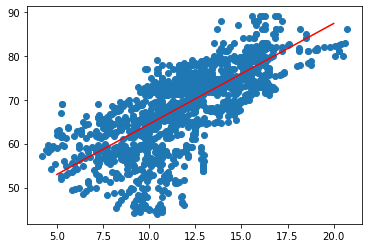

In [95]:
import matplotlib.pyplot as plt

slope = results.params['Schooling']
const = results.params['const']
x_line = np.linspace(5,20,10)
y_line = slope*x_line + const

fig, ax = plt.subplots()

ax.scatter(WHO_data['Schooling'], WHO_data['Life expectancy '])
ax.plot(x_line, y_line, c ='r')


In [96]:
WHO_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Q14: Compute the regression of life expectancy based on population, schooling, and HIV/AIDs rate per capita in a country's population.

In [118]:
X_multi = WHO_data[['Population', 'Schooling', ' HIV/AIDS']]
#augment it with the constant term
X_multi_aug = sm.add_constant(X_multi)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [119]:
X_multi_aug.head()

,const,Population,Schooling,HIV/AIDS
0,1.0,33736494.0,10.1,0.1
1,1.0,327582.0,10.0,0.1
2,1.0,31731688.0,9.9,0.1
3,1.0,3696958.0,9.8,0.1
4,1.0,2978599.0,9.5,0.1


In [120]:
results_multi = sm.OLS(y, X_multi_aug).fit()

Q15: Print out the coefficients of regression. Get the $R^2$ value. 

In [121]:
results_multi.params

const         4.661986e+01
Population   -1.207290e-09
Schooling     1.982540e+00
 HIV/AIDS    -6.694160e-01
dtype: float64

In [122]:
results_multi.rsquared

0.7304835799299605

Q16: Print out the results summary. Use the report to figure out which of variables are not important if there are any. Which metric did you use to evaluate this? Explain yourself.

In [123]:
results_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1486.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:32:42   Log-Likelihood:                -4843.9
No. Observations:                1649   AIC:                             9696.
Df Residuals:                    1645   BIC:                             9717.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.6199      0.523     89.061      0.000      45.593      47.647
Population -1.207e-09    1.6e-09     -0.754      0.451   -4.35e-09    1.93e-09
Schooling      1.9825      0.041     48.048      0.000       1.902       2.063
 HIV/AIDS     -0.6694      0.019    -35.025      0.000      -0.707      -0.632
==============================================================================
Omnibus:                       16.917   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.724
Skew:                          -0.158   Prob(JB):                     3.16e-05
Kurtosis:                       3.449   Cond. No.                     3.36e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value for the coefficients test against the hypothesis that the coefficients are zero under the null. Population has a p-value greater than 0.05 so its probably not too important of a variable assuming linearity of the model.

Q17: Is your modeling performing better or worse? Why?

This model is clearly better. It explains 73% of the variance in life expectancy as opposed to only 50%. Including HIV/AIDS prevalence along with average years of schooling really help us out.

Q18: Explain what the adjusted $R^2$ is and how it is different than $R^2$. Just in words, no need for formulas.

Adding variables to your model with no predictive power $R^2$ can remain the same. Adjusted $R^2$ is a metric that measures model quality by also penalizes for useless variables. As you add more variables that don't help much in explaining the variance of the target adjusted $R^2$ becomes lower.

Q19: Bayes



Suppose some rare disease affects 1 in 100,000 people. There is a test for it, though it is imperfect: 5% of the people who have the disease will test negative and 4% of the people who don't have the disease will test positive for it. You take the test and test positive. Before the test the probability that you had the disease was only 1 in 100,000. But now, with this new information of the positive test, how should you judge the probability that you have the disease?



We can use Bayes's Theorem:

<br>
$$P(h | e) = \frac{P(e | h)P(h)}{P(e)}$$


What are $h$ and $e$ in this case?


To calculate the denominator, we'll need to make use of the **Rule of Total Evidence**: <br/><br/>

$$ P(e) = P(e | h_1)P(h_1) + ... + P(e | h_n)P(h_n) $$


In our case, there are only two possibilities: Either I have the disease or I do not.

- h is a binary random variable for having the disease.
- e is a binary random variable signifying whether the test came out positive or negative

In [124]:
# prior on having the disease before testing
#i.e. p(h = 1)
prior = 1/100000

# probability that e = 0 testing negative, given the person has the disease
alpha = 0.05

# probability that e = 1 testing positive, given the person has the disease
# p(e = 1|h = 1)

alpha_c = 1 - 0.05


# we want that the probability that you have the disease given you got a positive test

#p(h=1|e=1).


(prior * alpha_c) / (prior * 0.95 + 0.04 * (1 - prior))

0.00023744598103931353